# What is a decision tree?
A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes

Target lable would always be ur leaf node and rest of the things are decision factors , on how fast u want to come to the factor 
Depth of the tree (hyperparameter) makes the tree more detailed or time taking thus u might have to prune the tree
As u go down the more depth u add the more pure are decision nodes and more accurate the decision 

 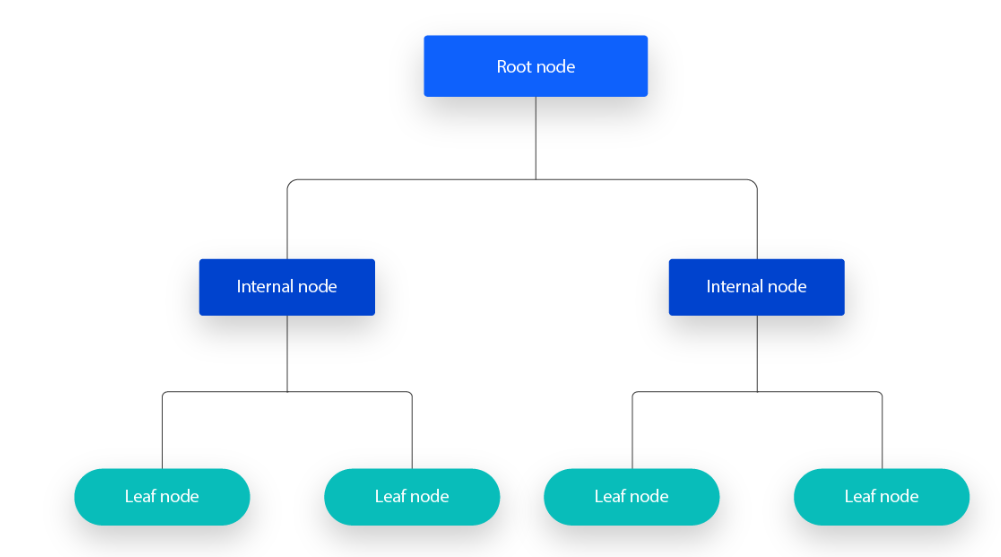

Thus having a binary type is imporatant or makes it more efficient 

In [33]:
import numpy as np  # For numerical computations
import pandas as pd  # For handling datasets
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For advanced visualization
# Scikit-Learn for Model Training & Evaluation
from sklearn.model_selection import train_test_split  # Splitting dataset
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Data preprocessing
from sklearn.tree import DecisionTreeClassifier  # Decision Tree model

# Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc  # ROC and AUC
from sklearn.metrics import confusion_matrix, classification_report  # Performance metrics


In [34]:
#Step 1 - Load Data 
df=pd.read_csv("iphone_purchase_records.csv")
df.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [35]:
# Step 2: Convert Gender to Number
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()  
df['Gender'] = label_encoder.fit_transform(df['Gender'])  

df.head()


,Gender,Age,Salary,Purchase Iphone
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [36]:
df['Purchase Iphone'].value_counts()

Purchase Iphone
0    257
1    143
Name: count, dtype: int64

Should we scale this data ? why scale ? cause it is usually used in distance based algorithms so why scaling here?
So it is generally used when 2 columns have numerical differences like here age is in tens and salary is in thousands 


In [38]:
X=df[['Gender','Age','Salary']]#scaling preprocessing everything happens on X 
y=df[['Purchase Iphone']]

In [39]:
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Apply scaling to training data
X_test = scaler.transform(X_test)  # Apply same scaling to test data
#using std scaler cause we arent sure if salary might have heavy outliers or not 

GINI values (should be low) = IMPURITY

IG(information Gain)(Should be High 

# Fit the Decision Tree Classifier 

In [41]:

classifier = DecisionTreeClassifier(criterion='gini', max_depth=3)
classifier.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3)

In [42]:
y_pred = classifier.predict(X_test)

In [43]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.2f}")

# Print Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Decision Tree Accuracy: 0.91
Confusion Matrix:
[[47  5]
 [ 2 26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93        52
           1       0.84      0.93      0.88        28

    accuracy                           0.91        80
   macro avg       0.90      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80



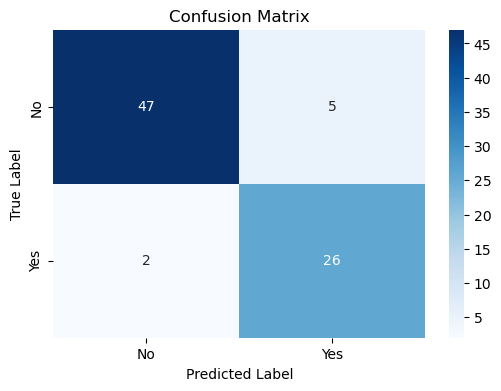

In [44]:

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))  # Correct way to set figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



In [45]:
#this gives us probs that each test sample belongs to class 1
y_pred_proba = classifier.predict_proba(X_test)[:,1]

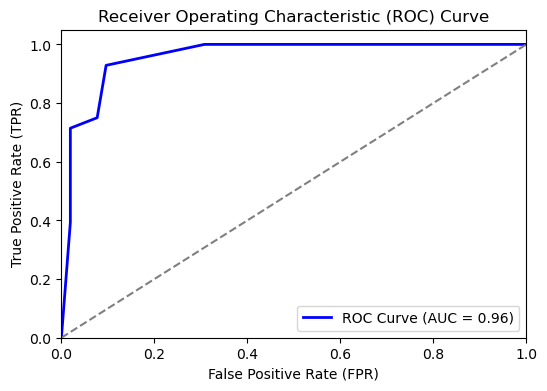

In [46]:
# ROC AUC curve 
# Compute the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [47]:
roc_auc = roc_auc_score(y_test,y_pred_proba)
print("ROC AUC Score:",roc_auc)

ROC AUC Score: 0.9584478021978022
